In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

In [3]:
data=pd.read_csv('train.csv')

In [4]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [6]:
data.Age=data['Age'].fillna(data['Age'].median())

In [8]:
data['Died']=1-data['Survived']

In [9]:
data.groupby('Sex').sum()

PassengerId  Survived  Pclass       Age  SibSp  Parch        Fare  \
Sex                                                                         
female       135343       233     678   8770.00    218    204  13966.6628   
male         262043       109    1379  17391.17    248    136  14727.2865   

        Died  
Sex           
female    81  
male     468

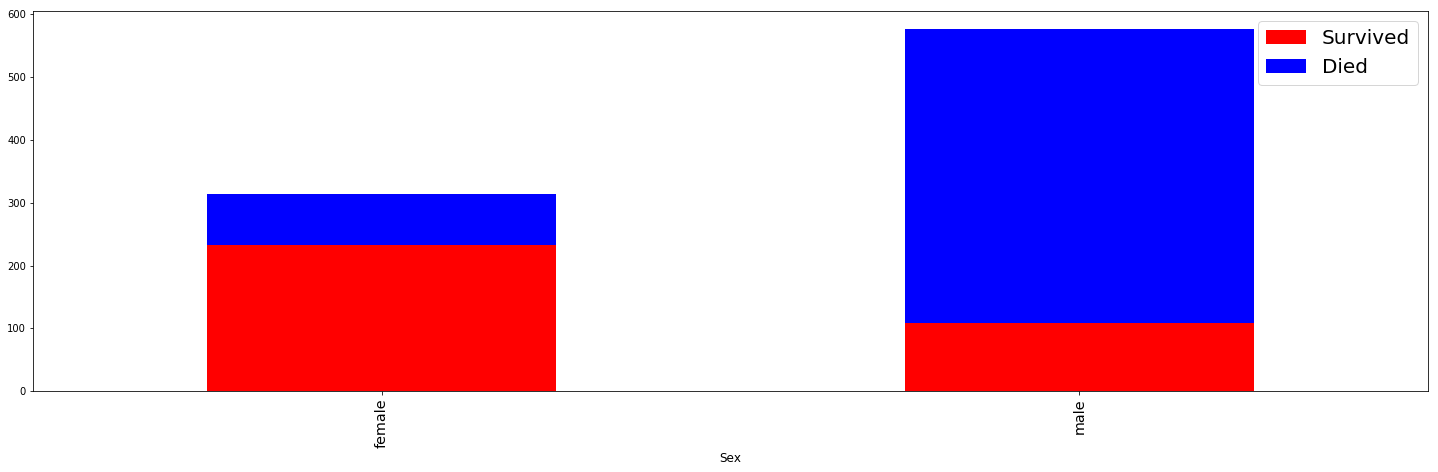

In [14]:
data.groupby('Sex').sum()[['Survived','Died']].plot(kind='bar',stacked=True,figsize=(25,7),colors=['r','b'])

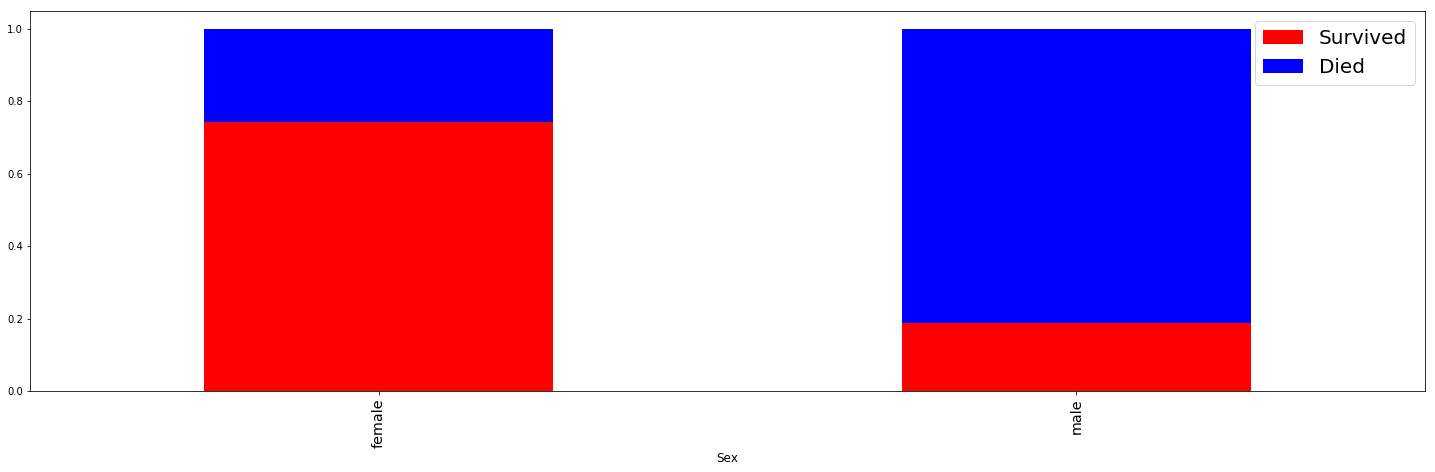

In [19]:
data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, colors=[ 'r','b']);

In [20]:
data.groupby('Sex').agg('mean')

PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Sex                                                                      
female   431.028662  0.742038  2.159236  27.929936  0.694268  0.649682   
male     454.147314  0.188908  2.389948  30.140676  0.429809  0.235702   

             Fare      Died  
Sex                          
female  44.479818  0.257962  
male    25.523893  0.811092

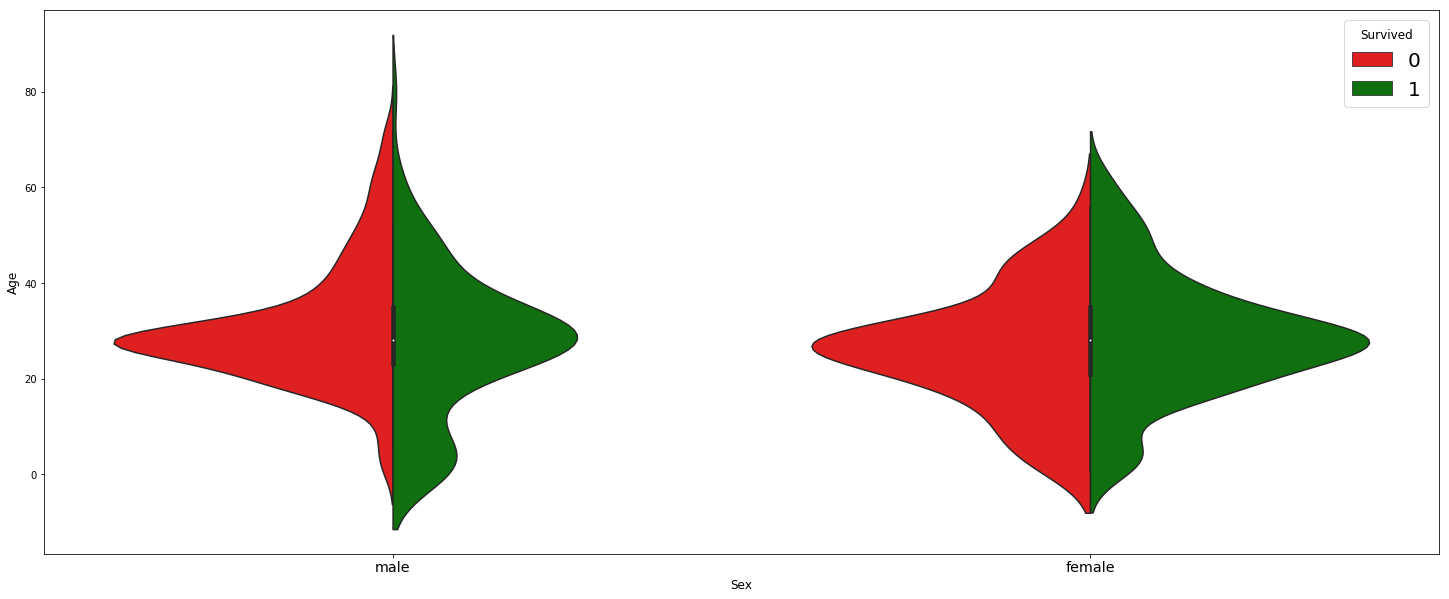

In [31]:
plt.figure(figsize=(25,10))
sns.violinplot(x='Sex',y='Age',data=data,hue='Survived',split=True,palette={0: "r", 1: "g"},scale='area')

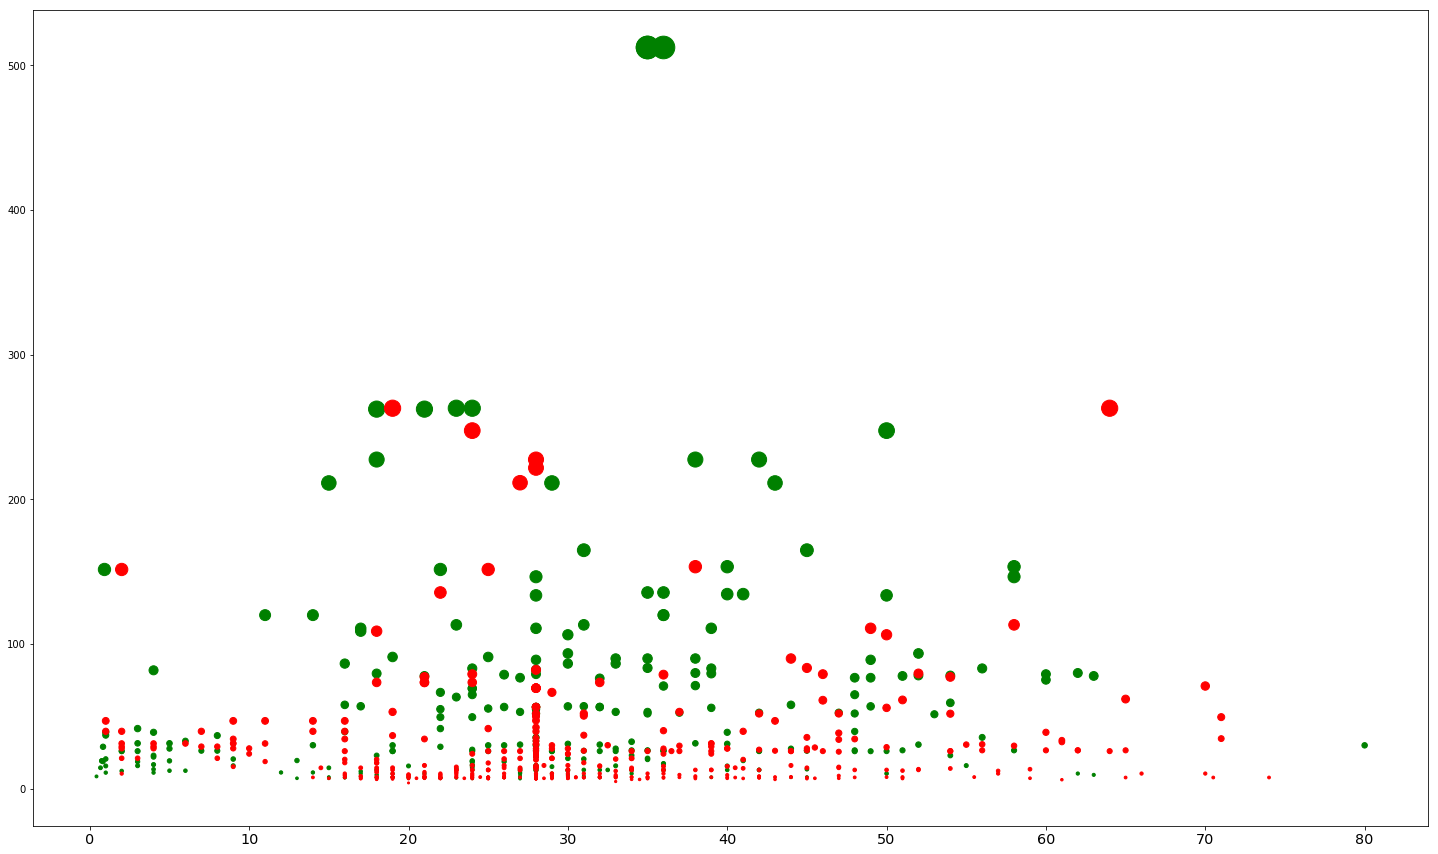

In [34]:
plt.figure(figsize=(25, 15))
ax = plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], 
           c='green', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], 
           c='red', s=data[data['Survived'] == 0]['Fare'])

In [37]:
data.groupby('Pclass').mean()['Fare']

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

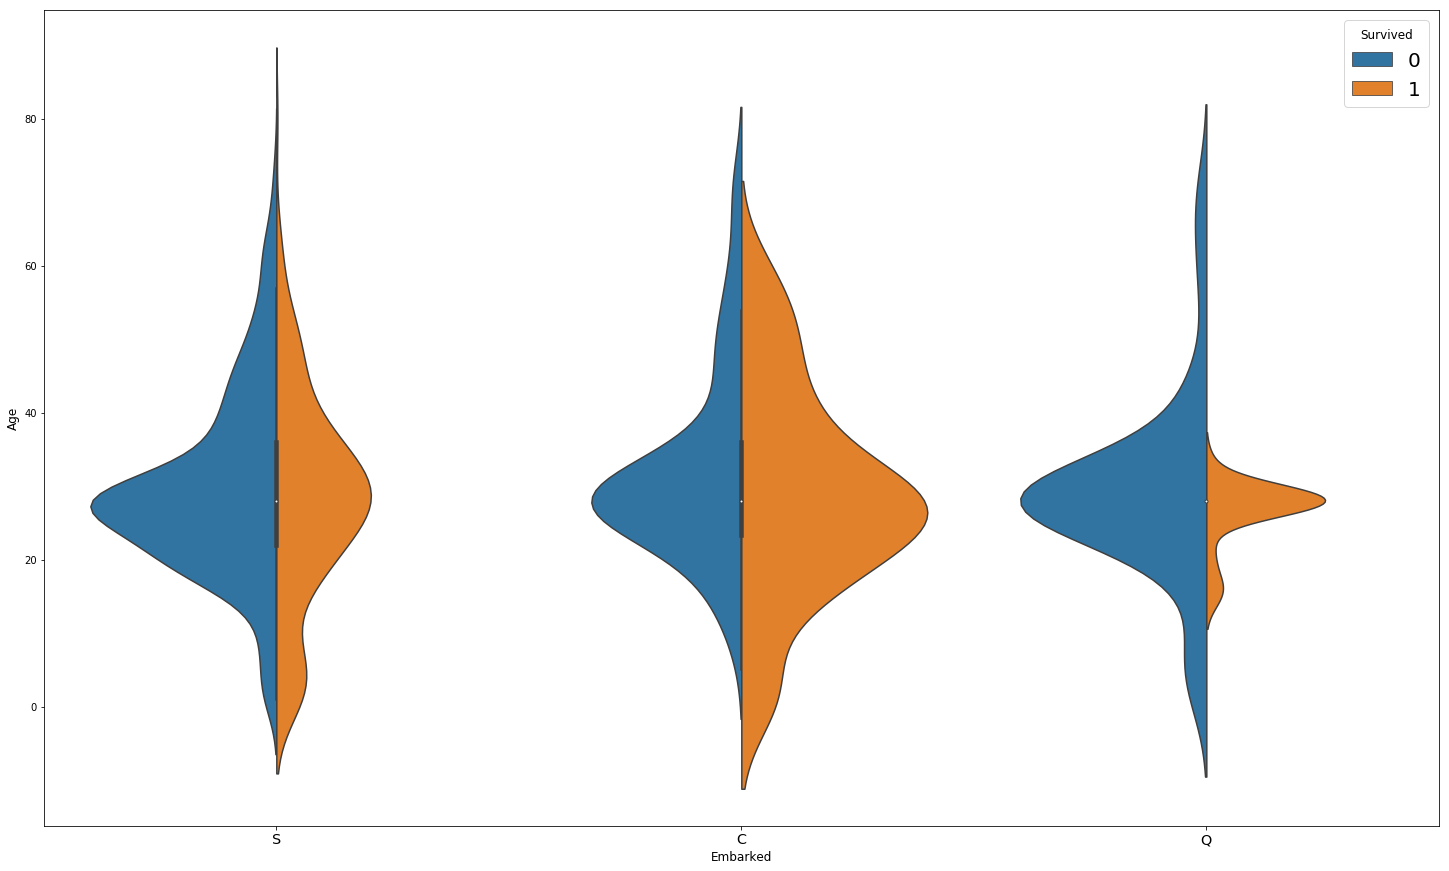

In [43]:
plt.figure(figsize=(25,15))
sns.violinplot(x='Embarked',y='Age',hue='Survived',split=True,data=data,scale='count')

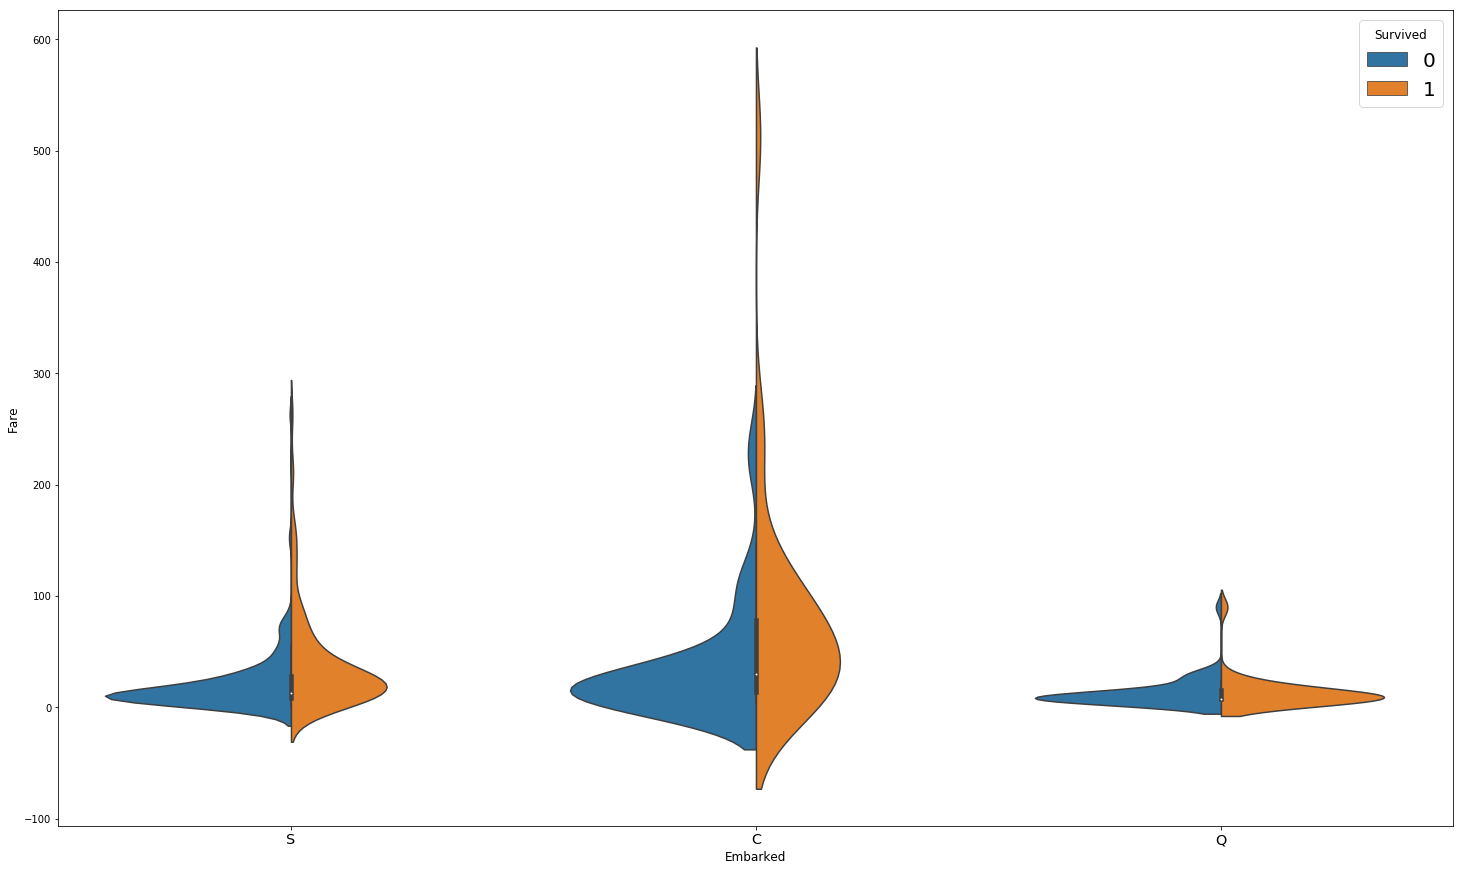

In [45]:
plt.figure(figsize=(25,15))
sns.violinplot(x='Embarked',y='Fare',hue='Survived',split=True,data=data)

In [46]:
def combine():
    train=pd.read_csv('train.csv')
    test=pd.read_csv('test.csv')
    y=train['Survived']
    train.drop('Survived',axis=1,inplace=True)
    comb=train.append(test)
    comb.reset_index(inplace=True)
    comb.drop(['index', 'PassengerId'], inplace=True, axis=1)
    
    return comb

In [77]:
comb=combine()

In [78]:
comb.head()

Pclass                                               Name     Sex   Age  \
0       3                            Braund, Mr. Owen Harris    male  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2       3                             Heikkinen, Miss. Laina  female  26.0   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4       3                           Allen, Mr. William Henry    male  35.0   

   SibSp  Parch            Ticket     Fare Cabin Embarked  
0      1      0         A/5 21171   7.2500   NaN        S  
1      1      0          PC 17599  71.2833   C85        C  
2      0      0  STON/O2. 3101282   7.9250   NaN        S  
3      1      0            113803  53.1000  C123        S  
4      0      0            373450   8.0500   NaN        S

In [79]:
comb.shape

(1309, 10)

In [80]:
titles=set()
for i in data['Name']:
    titles.add(i.split(',')[1].split('.')[0].strip())

In [81]:
titles

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [82]:
tit = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    comb['Title'] = comb['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    comb['Title'] = comb.Title.map(tit)
    return comb

In [83]:
comb=get_titles()

In [84]:
comb.head()

Pclass                                               Name     Sex   Age  \
0       3                            Braund, Mr. Owen Harris    male  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2       3                             Heikkinen, Miss. Laina  female  26.0   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4       3                           Allen, Mr. William Henry    male  35.0   

   SibSp  Parch            Ticket     Fare Cabin Embarked Title  
0      1      0         A/5 21171   7.2500   NaN        S    Mr  
1      1      0          PC 17599  71.2833   C85        C   Mrs  
2      0      0  STON/O2. 3101282   7.9250   NaN        S  Miss  
3      1      0            113803  53.1000  C123        S   Mrs  
4      0      0            373450   8.0500   NaN        S    Mr

In [86]:
comb[comb['Title'].isnull()]

Pclass                          Name     Sex   Age  SibSp  Parch  \
1305       1  Oliva y Ocana, Dona. Fermina  female  39.0      0      0   

        Ticket   Fare Cabin Embarked Title  
1305  PC 17758  108.9  C105        C   NaN